#### <b>Classifier Clouds from Satellite</b>

--------

##### <b>Data Set: Clouds from Satellite Images</b>
- https://www.kaggle.com/code/preethikorukuri/understanding-clouds-from-satellite-images
- (Kaggle로부터 GCS 방식으로 로드)

##### <b> Classification target</b>

- 위성에서 찍은 구름 사진의 분류 

##### <b> Data Description</b>
- 구성
  - test_images (3698 files)
  - train_images (5546 files)
  - sample_submission.csv
  - train.csv
- images 파일 이름 형식: *******.jpg_(label)
- 파일 레이블: 
  - 구름사진은 형상에 따라 네 종류: Fish(물고기), Flower(꽃), Gravel(자갈), Sugar(설탕)   
  - 여러 레이블이 붙은 사진도 있음 

- 이미지 크기: 2100*1400 px

##### **필요 라이브러리 로드 & 함수 정의** 




In [ ]:
# 필요한 패키지 로드
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
def rle_decode(mask_rle: str = '', shape: tuple = (1400, 2100)):
    '''
    Decode rle encoded mask.
    
    :param mask_rle: run-length as string formatted (start length)
    :param shape: (height, width) of array to return 
    Returns numpy array, 1 - mask, 0 - background
    '''
    s = mask_rle.split()
    starts, lengths = [np.asarray(x, dtype=int) for x in (s[0:][::2], s[1:][::2])]
    starts -= 1
    ends = starts + lengths
    img = np.zeros(shape[0] * shape[1], dtype=np.uint8)
    for lo, hi in zip(starts, ends):
        img[lo:hi] = 1
    return img.reshape(shape, order='F')

##### **캐글에서 데이터셋 불러오기 (Kaggle API token 이용)**




In [ ]:
#@title
# 캐글에서 데이터셋 불러오기 (Kaggle API token 이용)
!pip install -q kaggle
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle.json': b'{"username":"jearthkim","key":"b87aaeed64ad9ff4ce7c33a7e5947710"}'}

In [ ]:
#@title
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle
!chmod 600 ~/.kaggle/kaggle.json

!kaggle competitions download -c understanding_cloud_organization

100% 5.79G/5.80G [01:02<00:00, 102MB/s]
100% 5.80G/5.80G [01:02<00:00, 99.3MB/s]


In [ ]:
#@title
!ls

kaggle.json  sample_data  understanding_cloud_organization.zip


In [ ]:
#@title
!unzip understanding_cloud_organization.zip

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
  inflating: train_images/186b357.jpg  
  inflating: train_images/1880aa1.jpg  
  inflating: train_images/18859af.jpg  
  inflating: train_images/18a8d69.jpg  
  inflating: train_images/18c6985.jpg  
  inflating: train_images/18c9fd5.jpg  
  inflating: train_images/18d341f.jpg  
  inflating: train_images/18e7e12.jpg  
  inflating: train_images/18f4182.jpg  
  inflating: train_images/18fb01f.jpg  
  inflating: train_images/19047cf.jpg  
  inflating: train_images/1907dd8.jpg  
  inflating: train_images/1909098.jpg  
  inflating: train_images/19192fa.jpg  
  inflating: train_images/191c732.jpg  
  inflating: train_images/1930ced.jpg  
  inflating: train_images/1944d16.jpg  
  inflating: train_images/1945738.jpg  
  inflating: train_images/1945eb2.jpg  
  inflating: train_images/1955970.jpg  
  inflating: train_images/1959481.jpg  
  inflating: train_images/195f280.jpg  
  inflating: train_images/196c777.jpg  
  inflating: train_images/196f033.jpg  
  in

##### **데이터 확인 및 전처리**


In [ ]:
labels= ['Fish','Flower','Gravel','Sugar']

In [ ]:
sub= pd.read_csv('sample_submission.csv')
sub.head()

,Image_Label,EncodedPixels
0,002f507.jpg_Fish,1 1
1,002f507.jpg_Flower,1 1
2,002f507.jpg_Gravel,1 1
3,002f507.jpg_Sugar,1 1
4,0035ae9.jpg_Fish,1 1


In [ ]:
train= pd.read_csv('train.csv')
train.head()

,Image_Label,EncodedPixels
0,0011165.jpg_Fish,264918 937 266318 937 267718 937 269118 937 27...
1,0011165.jpg_Flower,1355565 1002 1356965 1002 1358365 1002 1359765...
2,0011165.jpg_Gravel,NaN
3,0011165.jpg_Sugar,NaN
4,002be4f.jpg_Fish,233813 878 235213 878 236613 878 238010 881 23...


In [ ]:
train['Label']=train['Image_Label'].apply(lambda x: x.split('_')[1])
train['Image_Name']=train['Image_Label'].apply(lambda x: x.split('_')[0])
train.drop(['Image_Label'], axis=1, inplace= True)
train.head(5)


,EncodedPixels,Label,Image_Name
0,264918 937 266318 937 267718 937 269118 937 27...,Fish,0011165.jpg
1,1355565 1002 1356965 1002 1358365 1002 1359765...,Flower,0011165.jpg
2,NaN,Gravel,0011165.jpg
3,NaN,Sugar,0011165.jpg
4,233813 878 235213 878 236613 878 238010 881 23...,Fish,002be4f.jpg


0 11200 7f9c8a2.jpg
1 11201 7f9c8a2.jpg
2 11202 7f9c8a2.jpg
3 11203 7f9c8a2.jpg
0 20272 e9c309f.jpg
1 20273 e9c309f.jpg
2 20274 e9c309f.jpg
3 20275 e9c309f.jpg
0 16652 c0952e5.jpg
1 16653 c0952e5.jpg
2 16654 c0952e5.jpg
3 16655 c0952e5.jpg
0 22076 ff4222b.jpg
1 22077 ff4222b.jpg
2 22078 ff4222b.jpg
3 22079 ff4222b.jpg


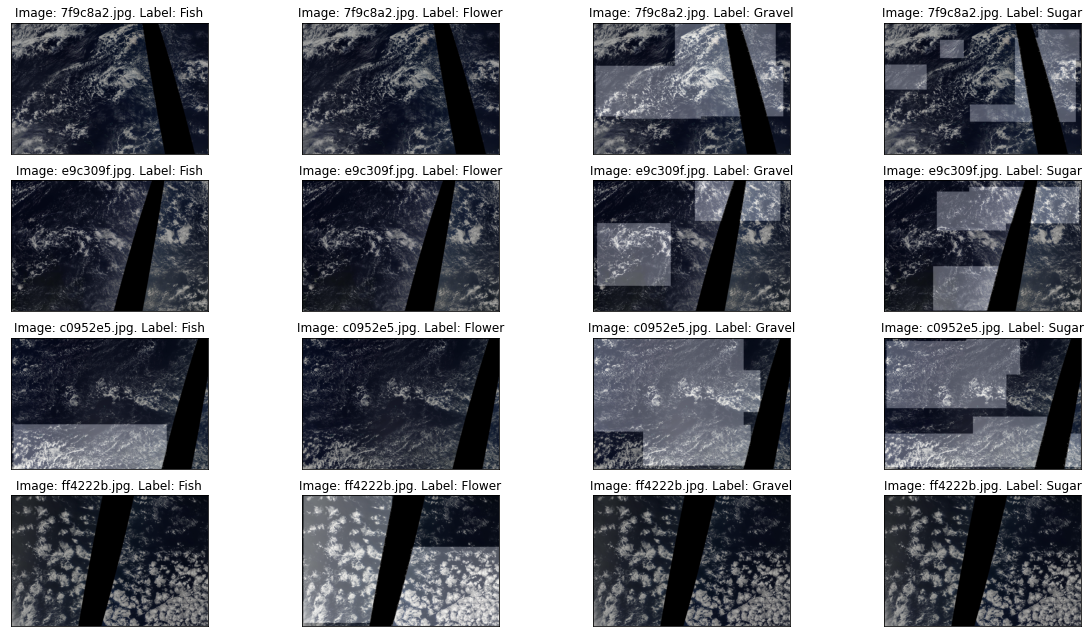

In [ ]:
from PIL import Image


fig = plt.figure(figsize=(20, 14))

for j, imgId in enumerate(np.random.choice(train['Image_Name'].unique(), 4)):
  for i, (idx, info) in enumerate(train.loc[train['Image_Name'] == imgId].iterrows()):
    # print(i,idx, info.Image_Name)

    ax = fig.add_subplot(5, 4, j * 4 + i + 1, xticks=[], yticks=[])
    img = Image.open(f"train_images/{info.Image_Name}")
    plt.imshow(img)
    try: 
      mask = rle_decode(info.EncodedPixels) # 레이블에 해당하는 구름이미지 있을 경우 마스킹 
    except:
      mask = np.zeros((1400, 2100)) # 레이블에 해당하는 구름이미지 없을 경우 빈칸 (마스킹x) 
    
    plt.imshow(mask, alpha=0.3, cmap='gray')
    ax.set_title(f"Image: {info.Image_Name}. Label: {info.Label}")
    

하나의 사진에 여러 구름 레이블이 붙어있다.  

Encoded pixels의 값이 서로 상이한것을 보아 하나의 사진에 여러 구름 형태가 찍힌것으로 이해할 수 있다. 

구름의 위치정보(Encoded Pixels)가 NaN value인 경우 
주변 값으로 대체해줄 값이 마땅하지 않으므로, 
해당 샘플을 제거해준다. 

In [ ]:
train.dropna(inplace= True)
train.head()

,EncodedPixels,Label,Image_Name
0,264918 937 266318 937 267718 937 269118 937 27...,Fish,0011165.jpg
1,1355565 1002 1356965 1002 1358365 1002 1359765...,Flower,0011165.jpg
4,233813 878 235213 878 236613 878 238010 881 23...,Fish,002be4f.jpg
5,1339279 519 1340679 519 1342079 519 1343479 51...,Flower,002be4f.jpg
7,67495 350 68895 350 70295 350 71695 350 73095 ...,Sugar,002be4f.jpg


In [ ]:
train.shape

(11836, 3)

In [ ]:
train['Label'].value_counts()

Sugar     3751
Gravel    2939
Fish      2781
Flower    2365
Name: Label, dtype: int64

In [ ]:
train['Image_Name'].value_counts().value_counts() # 레이블 갯수에 따른 이미지의 갯수

2    2372
3    1560
1    1348
4     266
Name: Image_Name, dtype: int64

In [ ]:
import os
N_train= len(os.listdir('train_images'))
N_test= len(os.listdir('test_images'))
print(N_train, N_test)

5546 3698
